<a href="https://colab.research.google.com/github/Erika2397/Clusterizacion-como-manejar-datos-no-etiquetados-/blob/main/notebooks/aula_5/notebook_aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/Erika2397/Clusterizacion-como-manejar-datos-no-etiquetados-/refs/heads/main/datos_mkt_traducido.csv'

# Recopilando y ajustando datos

In [ ]:
df = pd.read_csv(url)
df

,sexo,edad,numero_de_amigos,basquet,futbol_americano,futbol,softbol,voleibol,natacion,animacion,...,musica,rock,cabello,vestido,centro_comercial,compras,ropa,nuestra_marca,marca_de_la_competencia,bebidas
0,F,27,49,0,0,10,0,0,10,0,...,0,0,0,0,0,0,0,0,0,10
1,F,27,41,0,0,0,0,0,0,0,...,10,20,40,0,10,0,0,0,0,10
2,F,26,1,0,0,0,0,0,10,0,...,10,0,50,0,0,0,30,0,0,0
3,M,28,32,0,50,0,0,0,0,0,...,10,10,0,0,0,0,0,0,0,0
4,M,28,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,F,26,21,0,0,0,0,0,0,0,...,0,10,10,0,0,0,20,0,0,0
12988,F,26,50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12989,F,27,32,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,0,0,0
12990,F,27,20,0,0,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12992 entries, 0 to 12991
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sexo                     12992 non-null  object
 1   edad                     12992 non-null  int64 
 2   numero_de_amigos         12992 non-null  int64 
 3   basquet                  12992 non-null  int64 
 4   futbol_americano         12992 non-null  int64 
 5   futbol                   12992 non-null  int64 
 6   softbol                  12992 non-null  int64 
 7   voleibol                 12992 non-null  int64 
 8   natacion                 12992 non-null  int64 
 9   animacion                12992 non-null  int64 
 10  beisbol                  12992 non-null  int64 
 11  tenis                    12992 non-null  int64 
 12  deportes                 12992 non-null  int64 
 13  tierno                   12992 non-null  int64 
 14  danza                    12992 non-nul

In [ ]:
df['sexo'].unique()

array(['F', 'M', 'NE'], dtype=object)

## Aplicando codificador

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories=[['F', 'M', 'NE']], sparse_output=False)

In [ ]:
sexo_codificado = encoder.fit_transform(df[['sexo']])
sexo_codificado

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
encoded_df = pd.DataFrame(sexo_codificado, columns=encoder.get_feature_names_out(['sexo']))

In [ ]:
datos = pd.concat([df, encoded_df], axis=1).drop('sexo', axis=1)
datos

,edad,numero_de_amigos,basquet,futbol_americano,futbol,softbol,voleibol,natacion,animacion,beisbol,...,vestido,centro_comercial,compras,ropa,nuestra_marca,marca_de_la_competencia,bebidas,sexo_F,sexo_M,sexo_NE
0,27,49,0,0,10,0,0,10,0,0,...,0,0,0,0,0,0,10,1.0,0.0,0.0
1,27,41,0,0,0,0,0,0,0,10,...,0,10,0,0,0,0,10,1.0,0.0,0.0
2,26,1,0,0,0,0,0,10,0,0,...,0,0,0,30,0,0,0,1.0,0.0,0.0
3,28,32,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,28,18,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,26,21,0,0,0,0,0,0,0,0,...,0,0,0,20,0,0,0,1.0,0.0,0.0
12988,26,50,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,1.0,0.0,0.0
12989,27,32,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
12990,27,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0


In [ ]:
import joblib

joblib.dump(encoder,'encoder.pkl')

['encoder.pkl']

## Desarrollando el modelo

In [ ]:
from sklearn.cluster import KMeans

mod_kmeans = KMeans(n_clusters=2, random_state=45)

In [ ]:
modelo = mod_kmeans.fit(datos)

# Evaluando el K-means

In [ ]:
mod_kmeans.inertia_

24912957.594588462

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(datos,mod_kmeans.predict(datos))

np.float64(0.3799715886302017)

## Evaluando métricas para diferentes K

In [ ]:
def evaluacion(datos):
  inercia = []
  silueta = []

  for k in range(2,21):
    kmeans = KMeans(n_clusters=k, random_state=45, n_init='auto')
    kmeans.fit(datos)
    inercia.append(kmeans.inertia_)
    silueta.append(f'k={k} - '+ str(silhouette_score(datos, kmeans.predict(datos))))
  return silueta, inercia

In [ ]:
silueta, inercia = evaluacion(datos)
silueta

['k=2 - 0.3799715886302017',
 'k=3 - 0.2631947012216279',
 'k=4 - 0.27497370057197046',
 'k=5 - 0.2762790287828939',
 'k=6 - 0.2814107923103627',
 'k=7 - 0.19566339131554092',
 'k=8 - 0.12271514125212872',
 'k=9 - 0.1281093701405103',
 'k=10 - 0.13020718009107704',
 'k=11 - 0.13209306347804026',
 'k=12 - 0.09015815350273831',
 'k=13 - 0.09002551845716941',
 'k=14 - 0.08959066111262458',
 'k=15 - 0.09427696863257996',
 'k=16 - 0.09552364235312874',
 'k=17 - 0.09543714624178481',
 'k=18 - 0.08844412672288283',
 'k=19 - 0.0844173588143633',
 'k=20 - 0.08484109789709748']

## Clase 2.3 - Verificando la silueta por muestras

In [ ]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silueta (n_clusters, datos):

  # Aplica el KMeans al conjunto de datos
  kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
  cluster_prevision = kmeans.fit_predict(datos)

  # Calcula la silueta promedio
  silueta_promedio = silhouette_score(datos, cluster_prevision)
  print(f'Valor promedio para {n_clusters} clusters: {silueta_promedio:.3f}')

  # Calcula a puntuacion de silueta para cada muestra
  silueta_muestra = silhouette_samples(datos, cluster_prevision)

  # Configuracion de figura para el grafico de silueta
  fig, ax1 = plt.subplots(1, 1)
  fig.set_size_inches(9, 7)

  # Limites del grafico de silueta
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(datos) + (n_clusters + 1) * 10])

  y_lower = 10
  for i in range(n_clusters):
      ith_cluster_silueta_muestra = silueta_muestra[cluster_prevision == i]
      ith_cluster_silueta_muestra.sort()

      tamano_cluster_i = ith_cluster_silueta_muestra.shape[0]
      y_upper = y_lower + tamano_cluster_i

      cor = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silueta_muestra,
                        facecolor=cor, edgecolor=cor, alpha=0.7)

      ax1.text(-0.05, y_lower + 0.5 * tamano_cluster_i, str(i))
      y_lower = y_upper + 10  # 10 para o espaço entre gráficos

  # Linea vertical para el promedio de Silhouette Score
  ax1.axvline(x=silueta_promedio, color='red', linestyle='--')

  ax1.set_title(f'Gráfico de silueta para {n_clusters} clusters')
  ax1.set_xlabel('Valores del coeficiente de silueta')
  ax1.set_ylabel('Etiqueta del cluster')

  ax1.set_yticks([])  # Remueve ticks
  ax1.set_xticks([i/10.0 for i in range(-1, 11)])

  plt.show()

Valor promedio para 2 clusters: 0.380


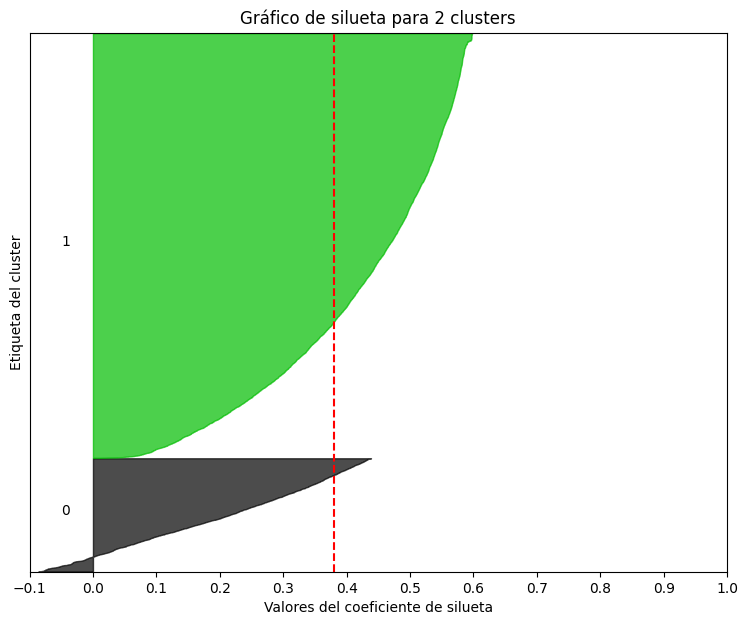

In [ ]:
graf_silueta(2, datos)

### Otras visualizaciones

In [ ]:
def plot_codo(inercia):
  plt.figure(figsize=(8,4))
  plt.plot(range(2,21), inercia, 'bo-')
  plt.xlabel('Número_de_clusters')
  plt.ylabel('Inércia')
  plt.title('Método del Codo para Determinación de k')
  plt.show()

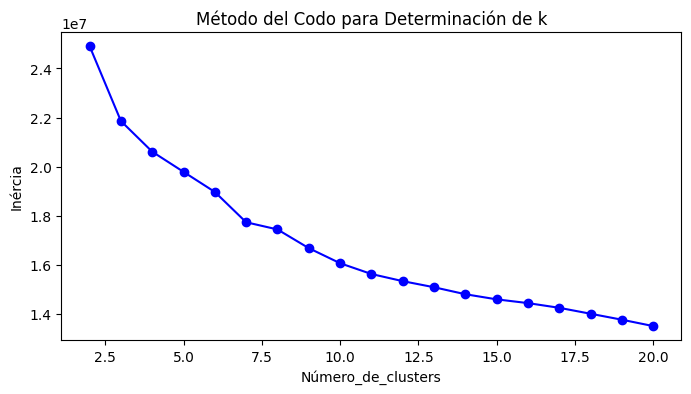

In [ ]:
plot_codo(inercia)

# Evaluación y ajuste de datos

In [ ]:
datos.describe()

,edad,numero_de_amigos,basquet,futbol_americano,futbol,softbol,voleibol,natacion,animacion,beisbol,...,vestido,centro_comercial,compras,ropa,nuestra_marca,marca_de_la_competencia,bebidas,sexo_F,sexo_M,sexo_NE
count,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,...,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000
mean,26.852679,31.283790,3.063424,2.927186,2.536946,1.836515,1.641010,1.548645,1.207666,1.198430,...,1.340055,2.977986,4.094828,1.720289,0.819735,0.589594,1.050647,0.761469,0.166256,0.072275
std,1.203746,35.891178,8.374443,7.431099,9.810703,7.881526,6.818708,5.862203,5.376673,5.558905,...,4.934874,7.479126,7.670547,5.092112,3.799795,2.999547,4.492218,0.426202,0.372325,0.258953
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,27.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,28.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,30.000000,605.000000,220.000000,90.000000,220.000000,170.000000,140.000000,310.000000,80.000000,140.000000,...,70.000000,120.000000,110.000000,80.000000,80.000000,80.000000,80.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

datos_escalados = scaler.fit_transform(datos)
datos_escalados

array([[0.66666667, 0.08099174, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.66666667, 0.0677686 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.55555556, 0.00165289, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.66666667, 0.05289256, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.66666667, 0.03305785, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.44444444, 0.04132231, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
datos_escalados = pd.DataFrame(datos_escalados, columns=datos.columns)
datos_escalados.describe()

,edad,numero_de_amigos,basquet,futbol_americano,futbol,softbol,voleibol,natacion,animacion,beisbol,...,vestido,centro_comercial,compras,ropa,nuestra_marca,marca_de_la_competencia,bebidas,sexo_F,sexo_M,sexo_NE
count,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,...,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000
mean,0.650298,0.051709,0.013925,0.032524,0.011532,0.010803,0.011721,0.004996,0.015096,0.008560,...,0.019144,0.024817,0.037226,0.021504,0.010247,0.007370,0.013133,0.761469,0.166256,0.072275
std,0.133750,0.059324,0.038066,0.082568,0.044594,0.046362,0.048705,0.018910,0.067208,0.039706,...,0.070498,0.062326,0.069732,0.063651,0.047497,0.037494,0.056153,0.426202,0.372325,0.258953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.555556,0.008264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.666667,0.034711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.777778,0.074380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Verificando las métricas para los nuevos datos

In [ ]:
silueta, inercia = evaluacion(datos_escalados)
silueta

['k=2 - 0.3799715886302017',
 'k=3 - 0.2631947012216279',
 'k=4 - 0.27497370057197046',
 'k=5 - 0.2762790287828939',
 'k=6 - 0.2814107923103627',
 'k=7 - 0.19566339131554092',
 'k=8 - 0.12271514125212872',
 'k=9 - 0.1281093701405103',
 'k=10 - 0.13020718009107704',
 'k=11 - 0.13209306347804026',
 'k=12 - 0.09015815350273831',
 'k=13 - 0.09002551845716941',
 'k=14 - 0.08959066111262458',
 'k=15 - 0.09427696863257996',
 'k=16 - 0.09552364235312874',
 'k=17 - 0.09543714624178481',
 'k=18 - 0.08844412672288283',
 'k=19 - 0.0844173588143633',
 'k=20 - 0.08484109789709748']

Valor promedio para 3 clusters: 0.745


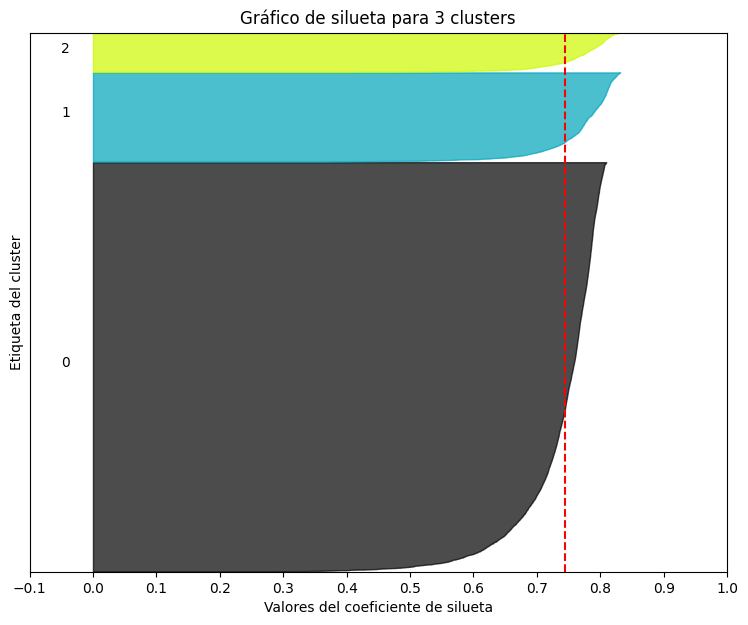

In [ ]:
graf_silueta(3, datos_escalados)

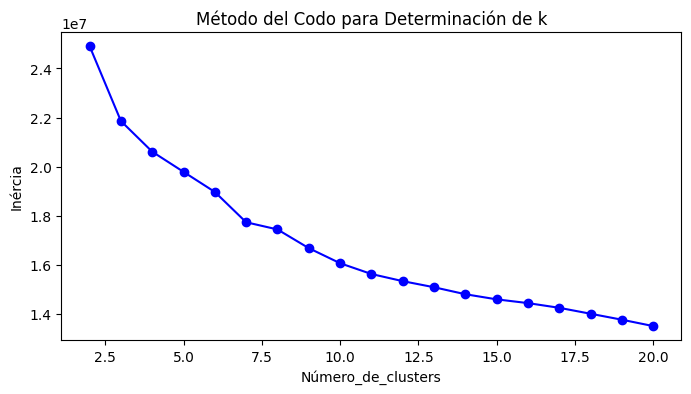

In [ ]:
plot_codo(inercia)

## Creando el mejor modelo

ATE AQUI PRIMEIRO VIDEO AULA 4

In [ ]:
modelo_kmeans = KMeans(n_clusters = 3, random_state = 45, n_init = 'auto')
modelo_kmeans.fit(datos_escalados)

KMeans(n_clusters=3, random_state=45)

In [ ]:
joblib.dump(modelo_kmeans, 'kmeans.pkl')

['kmeans.pkl']

# Analizando las informaciones de cada cluster

In [ ]:
datos_analisis = pd.DataFrame()

datos_analisis[datos_escalados.columns] = scaler.inverse_transform(datos_escalados)

datos_analisis

,edad,numero_de_amigos,basquet,futbol_americano,futbol,softbol,voleibol,natacion,animacion,beisbol,...,vestido,centro_comercial,compras,ropa,nuestra_marca,marca_de_la_competencia,bebidas,sexo_F,sexo_M,sexo_NE
0,27.0,49.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0
1,27.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,10.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0
2,26.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28.0,32.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,26.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0
12988,26.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12989,27.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12990,27.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
datos_analisis['cluster'] = modelo_kmeans.labels_

In [ ]:
cluster_promedio = datos_analisis.groupby('cluster').mean()

cluster_promedio.T

cluster,0,1,2
edad,26.787830,27.031944,27.123536
numero_de_amigos,32.382796,26.173611,31.460064
basquet,2.959668,3.763889,2.545261
futbol_americano,2.462347,5.347222,2.257721
futbol,2.567472,2.592593,2.087327
softbol,2.273325,0.097222,1.235357
voleibol,1.935712,0.453704,1.267306
natacion,1.693116,0.976852,1.341853
animacion,1.441423,0.092593,1.309904
beisbol,0.792480,3.231481,0.798722


In [ ]:
cluster_promedio = cluster_promedio.transpose()

cluster_promedio.columns = [0,1,2]

In [ ]:
cluster_promedio

,0,1,2
edad,26.787830,27.031944,27.123536
numero_de_amigos,32.382796,26.173611,31.460064
basquet,2.959668,3.763889,2.545261
futbol_americano,2.462347,5.347222,2.257721
futbol,2.567472,2.592593,2.087327
softbol,2.273325,0.097222,1.235357
voleibol,1.935712,0.453704,1.267306
natacion,1.693116,0.976852,1.341853
animacion,1.441423,0.092593,1.309904
beisbol,0.792480,3.231481,0.798722


## Describiendo cada agrupamiento

In [ ]:
cluster_promedio[0].sort_values(ascending=False)

,0
numero_de_amigos,32.382796
edad,26.787830
musica,8.541393
cabello,5.626200
danza,5.463459
compras,4.943900
tierno,4.413221
banda,3.368038
centro_comercial,3.260892
basquet,2.959668


In [ ]:
cluster_promedio[1].sort_values(ascending=False)

,1
edad,27.031944
numero_de_amigos,26.173611
musica,8.180556
futbol_americano,5.347222
banda,4.120370
basquet,3.763889
beisbol,3.231481
rock,3.148148
futbol,2.592593
danza,2.578704


In [ ]:
cluster_promedio[2].sort_values(ascending=False)

,2
numero_de_amigos,31.460064
edad,27.123536
musica,7.103301
danza,4.749734
cabello,4.345048
tierno,3.642173
compras,3.365282
centro_comercial,3.045793
banda,2.758253
basquet,2.545261


# Proyecto Final: Descubre tu Tribu Digital

En este proyecto vas a aplicar lo aprendido en clustering para segmentar usuarios según su estilo de vida y sus intereses.

La base de datos que usamos contiene información sobre deportes, música, ropa y más. A partir de estos datos, vas a descubrir **grupos con perfiles similares** que podrían representar "tribus digitales".


## Objetivo

🎯 **Objetivo:** Ayudar a un equipo de marketing a entender mejor los diferentes perfiles de usuarios para personalizar campañas y productos.

## Seleccionando variables

In [ ]:
# Seleccionamos solo las variables de comportamiento (intereses)
columnas_intereses = [
    'basquet', 'futbol_americano', 'futbol', 'softbol', 'voleibol', 'natacion',
    'animacion', 'beisbol', 'tenis', 'deportes', 'danza', 'banda',
    'marcha', 'musica', 'rock', 'cabello', 'vestido', 'compras', 'nuestra_marca',
    'marca_de_la_competencia', 'bebidas'
]

df_intereses = df[columnas_intereses]

In [ ]:
import seaborn as sns

sns.heatmap(df.groupby('cluster')[columnas_intereses].mean().T, cmap='YlGnBu')
plt.title("Mapa de calor de intereses por cluster")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Normalización
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_intereses)

# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Agregar los clusters al DataFrame original
df['cluster'] = clusters

## Visualización

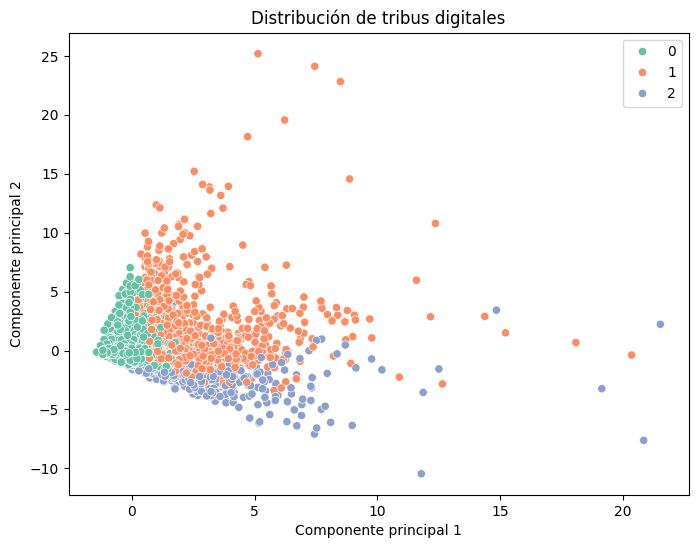

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=clusters, palette='Set2')
plt.title("Distribución de tribus digitales")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()

In [ ]:
# Analizamos el perfil medio de cada grupo
resumen = df.groupby('cluster')[columnas_intereses].mean().T
resumen

cluster,0,1,2
basquet,1.742604,9.707486,4.112554
futbol_americano,1.512413,10.069410,3.939394
futbol,1.746409,6.534457,3.073593
softbol,1.007324,6.187407,1.709957
voleibol,0.997812,4.759544,2.662338
natacion,1.253686,2.771443,2.922078
animacion,0.822791,2.771443,3.138528
beisbol,0.528869,4.630640,1.450216
tenis,0.750499,2.260783,1.385281
deportes,0.850376,5.587506,2.402597


## 🚀 Bonus: Visualiza todo como una app interactiva

Todo este análisis puede convertirse en una **aplicación web** usando Streamlit.
🔗 [Haz clic aquí para probar la app en vivo](erika2397-clusterizacion-como-manejar-datos-no-etiqu-app-jpr2kf)

La app permite:
- Cambiar la cantidad de clusters
- Elegir qué columnas usar
- Visualizar los grupos en 2D
- Ver el perfil promedio de cada tribu digital

In [ ]:
codigo_app = '''
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

st.set_page_config(page_title="Tribus digitales", layout="wide")
st.title("🧠 Descubre tu Tribu Digital")
st.subheader("Segmentación de estilo de vida con Machine Learning")

@st.cache_data
def cargar_datos():
    url = "https://raw.githubusercontent.com/Erika2397/Clusterizacion-como-manejar-datos-no-etiquetados-/refs/heads/main/datos_mkt_traducido.csv"
    return pd.read_csv(url)

df = cargar_datos()

st.write("Vista previa del dataset:")
st.dataframe(df.head())

columnas_intereses = [
    'basquet', 'futbol_americano', 'futbol', 'softbol', 'voleibol', 'natacion',
    'animacion', 'beisbol', 'tenis', 'deportes', 'danza', 'banda',
    'marcha', 'musica', 'rock', 'cabello', 'vestido', 'compras', 'nuestra_marca',
    'marca_de_la_competencia', 'bebidas'
]

k = st.slider("Número de clusters", 2, 10, 3)

df_intereses = df[columnas_intereses]
df_scaled = StandardScaler().fit_transform(df_intereses)
df_pca = PCA(n_components=2).fit_transform(df_scaled)
clusters = KMeans(n_clusters=k, random_state=42).fit_predict(df_scaled)

df['cluster'] = clusters

st.markdown("### Visualización de clusters (PCA)")
fig, ax = plt.subplots()
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=clusters, palette='Set2', ax=ax)
st.pyplot(fig)

st.markdown("### Perfil promedio por cluster")
resumen = df.groupby('cluster')[columnas_intereses].mean().T
st.dataframe(resumen.style.highlight_max(axis=1))
'''

# Guardar el código como archivo .py
with open('app.py', 'w') as f:
    f.write(codigo_app)

In [ ]:
requirements = '''
pandas
numpy
scikit-learn
matplotlib
seaborn
streamlit
'''

with open('requirements.txt', 'w') as f:
    f.write(requirements)